<a href="https://colab.research.google.com/github/ancka019/data_analysis-/blob/main/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/file.csv",  sep='\t')

In [ ]:
df.head()

,Территория,Тип керамики,Номер образца,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,О-в Сахалин,Охотский,31,0.05,0.04,0.94,0.48,0.48,0.04,0.01,0.16,0.83
1,О-в Сахалин,Охотский,71,0.05,0.06,0.88,0.45,0.25,0.30,0.02,0.20,0.78
2,О-в Сахалин,Охотский,11,0.16,0.06,0.78,0.40,0.43,0.17,0.03,0.13,0.83
3,О-в Сахалин,Охотский,131,0.20,0.05,0.75,0.54,0.37,0.09,0.00,0.14,0.86
4,О-в Сахалин,Охотский,141,0.09,0.01,0.89,0.43,0.50,0.08,0.03,0.12,0.85


In [ ]:
# Правильный ответ записываем в вектор y
y = df[u'Номер образца']
# Удаляем колонку с правильным ответом
df = df.drop(u'Номер образца', axis=1)

In [ ]:
df['Класс'] = df['Территория'] + ' ' + df['Тип керамики']

In [ ]:
df['Класс'] = pd.factorize(df['Класс'])[0]

In [ ]:
X = df.drop(['Территория', 'Тип керамики', 'Класс'], axis=1)

In [ ]:
Y = df['Класс']

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Класс, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               #presort=False
                              )

# Обучаем модель
model.fit(X, Y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

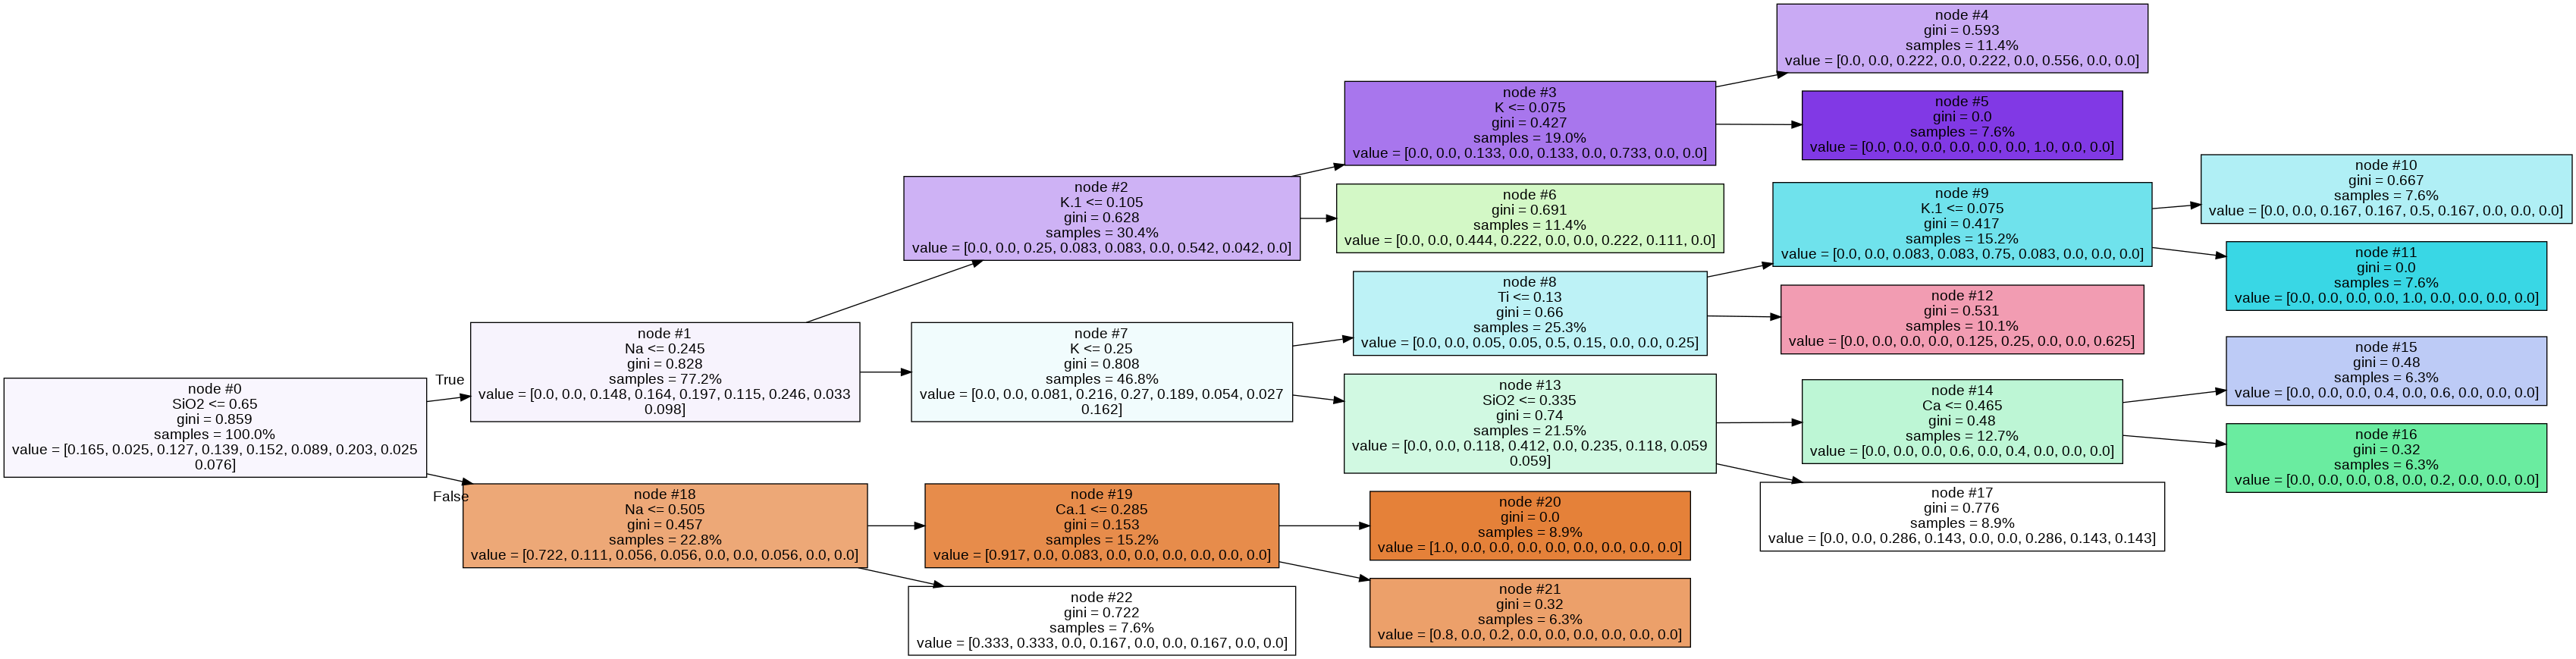

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(model,
                out_file='tree.dot',
                # задать названия фич
                feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )
# Преобразуем файл tree.dot в tree.png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png']);
# Вставляем картинку в блокнот
Image("tree.png")

In [ ]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
2,SiO2,0.350192
3,Na,0.232885
0,K,0.158330
7,Ti,0.120960
4,K.1,0.105989
1,Ca,0.024498
5,Ca.1,0.007145
6,Mg,0.000000
8,Fe,0.000000


In [ ]:
pred = model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 6, 2, 0, 2,
       6, 2, 2, 2, 4, 2, 3, 2, 5, 3, 5, 3, 3, 0, 4, 8, 6, 4, 4, 4, 6, 4,
       4, 4, 4, 4, 5, 4, 5, 5, 8, 3, 8, 6, 6, 2, 6, 6, 2, 0, 6, 6, 6, 6,
       2, 6, 6, 2, 6, 2, 2, 8, 2, 8, 8, 8, 8])

In [ ]:
Y.array

<PandasArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8,
 8]
Length: 79, dtype: int64

In [ ]:
df2 = pd.DataFrame([Y.array, pred], ['real', 'pred']).transpose()

In [ ]:
df2['T/F'] = (df2['real'] == df2['pred'])
df2.head(10)

,real,pred,T/F
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(Y, pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2,3,4,5,6,7,8
0,13,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0
2,1,0,6,0,1,0,2,0,0
3,1,0,3,4,1,2,0,0,0
4,0,0,0,0,9,0,2,0,1
5,0,0,0,1,1,3,0,0,2
6,1,0,4,0,0,0,11,0,0
7,0,0,2,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,5


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, pred)

0.6455696202531646